### Shannon's channel rate versus bandwidth

Both the bandwidth and the channel rate are scaled in units of $S/N_0$, where 
$S$ is the average signal power and $N_0$ the average noise power per Herz.  

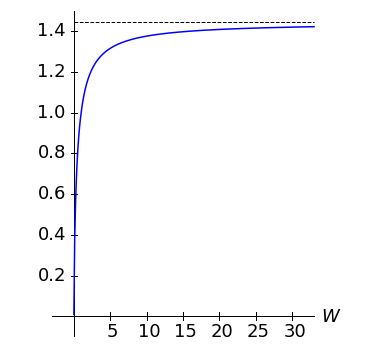

In [2]:
from PyM import *

def shannon_rate(w): return w * L(1+1/w)

# Important points
def X(k): return (k,0)
def Y(k): return (0,k)

# Range of the normalized bandwidth
# We start at 0.001 to avoid division by 0 
w = ls(0.001,33,300)

# plotting
close('all')

# Convenient steps for the axis
dx = 1; dy = 0.05


# Canvas
ax = plt.figure("Shannon's channel rate", figsize=(6,6))
plt.xlim(-6*dx,40)
plt.ylim(-2*dy,1.5) # maxrate = 1.44; see below

plt.axis('off')

# Axes    
ruler(X(0),X(30))
ruler(Y(0),Y(1.4))

# Ticking utilities and ticks on axes
def vtick(x,l=0.01):
    return seg((x,-l),(x,l))
def htick(y,l=0.01):
    return seg((-l,y),(l,y))
# 
for a in range(5,31,5):
    vtick(a,0.02)
for b in range(2,15,2):
    htick(b/10,0.4)

# Lables
for j in range(10,31,5):
    lable(X(j),str(j),dx=-1.2*dx,dy=-2*dy)
#
lable(X(5),str(5),dx=-0.5*dx,dy=-2*dy)

for j in range(2,15,2):
    lable(Y(j/10),str(j/10),dx=-5*dx,dy=-0.5*dy)

lable(X(34),r'$W$',dy=-0.5*dy) # r for latex typesetting

# Dashed segments. Here L = log2

maxrate = L(exp(1)) #~ 1.44 
seg(Y(maxrate),(33,maxrate),dashing='--')

# Draw Shannon's rate curve
plot(w, shannon_rate(w),color='blue')
    
plt.show()